In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import scipy.stats as stats
import numpy as np
import geopandas as gpd
import seaborn as sns
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.io import output_notebook
import holoviews as hv
from holoviews import opts
from math import pi
from itertools import cycle



In [10]:
# Files to Load
EV_Data = Path("Electric_Vehicle_Population_Data.csv")

# Read sneaker data and store into Pandas DataFrames
EV_df = pd.read_csv(EV_Data)
EV_df.head()

,VIN,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,Census_Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [11]:
EV_df.columns

Index(['VIN', 'County', 'City', 'State', 'Postal_Code', 'Model_Year', 'Make',
       'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', 'Census_Tract'],
      dtype='object')

In [12]:
EV_Counts = EV_df['State'].value_counts(dropna=True)
print(EV_Counts)

State
WA    177477
CA       101
VA        46
MD        31
TX        23
NC        16
IL        15
CO        12
FL        10
AZ        10
HI         9
NV         8
NJ         8
NY         7
SC         7
CT         6
AL         6
GA         6
MA         5
OR         5
MO         5
PA         4
LA         4
OH         4
BC         3
ID         3
KY         3
DC         3
IN         3
UT         3
MI         2
RI         2
AR         2
WY         2
KS         2
MN         2
NE         2
DE         1
OK         1
AK         1
AE         1
IA         1
NH         1
TN         1
NM         1
AP         1
Name: count, dtype: int64


## <insert text>

## Summarizes top 10 counties and making them Other

In [13]:
county_freq = EV_df['County'].value_counts()
bottom_10_percent = county_freq.quantile(0.10)
counties_less_than_10 = county_freq[county_freq < bottom_10_percent].index
EV_df['County'] = np.where(EV_df['County'].isin(counties_less_than_10), 'Other', EV_df['County'])

## EV growth per year by county

In [14]:
county_yearly_counts = EV_df.groupby(['Model_Year', 'County']).size().reset_index(name='Counts')
fig = px.bar(county_yearly_counts, x='Model_Year', y='Counts', color='County', title='Growth Series for Each County', barmode='stack')
fig.show()

## Electric vehicle counts by make

In [15]:
EV_CarMake = EV_df.value_counts("Make")
fig = px.bar(EV_CarMake, x=EV_CarMake.index, y=EV_CarMake.values, labels={'x':'Make', 'y':'Count'}, title='Electric Vehicle Counts by Make')
fig.show()

## EV registered by county

In [16]:
#Registered EV by county
EV_Counties = EV_df.value_counts("County")
EV_Counties

County
King           92740
Snohomish      21001
Pierce         13782
Clark          10416
Thurston        6428
               ...  
Leavenworth        1
Las Animas         1
Larimer            1
Laramie            1
Yuba               1
Name: count, Length: 196, dtype: int64

## Top electric utilities in Washington state

In [17]:
#Top utilities
EV_Utility = EV_df.value_counts("Electric_Utility")
EV_Utility

Electric_Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                               65990
PUGET SOUND ENERGY INC                                                                      35882
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                31381
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                            10173
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY              7828
                                                                                            ...  
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY||INLAND POWER & LIGHT COMPANY        2
CITY OF SEATTLE - (WA)                                                                          1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF JEFFERSON COUNTY                                   1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY|PUD NO 1 OF JEFFERSON COUNTY        1
BON

## Trending of Vehicle Types over the years

In [18]:
EV_df = EV_df[EV_df['Model_Year'] <= 2023]
grouped_Electric_Vehicle_Type = EV_df.groupby(['Model_Year', 'Electric_Vehicle_Type']).size().reset_index(name='Count')
fig = px.line(grouped_Electric_Vehicle_Type, x='Model_Year', y='Count', color='Electric_Vehicle_Type', title='Trending of Vehicle Types over the Years')
fig.show()

## Top EV models

In [19]:
# Filter
EV_df = EV_df[(EV_df['Model_Year'] >= 2019) & (EV_df['Model_Year'] <= 2023)]
data = EV_df['Model'].value_counts()
data = data.reset_index()
data.columns = ['Model', 'Count']

# proportions of each model
data['angle'] = data['Count']/data['Count'].sum() * 2*pi

# iterator
colors = cycle(Spectral6)
data['color'] = [next(colors) for _ in range(len(data))]

output_notebook()

p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@Model: @Count", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Model', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None
show(p)

Loading BokehJS ...

## Top cities with EVs

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
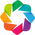

:Bars   [City]   (count)

In [20]:
hv.extension('bokeh')
# Count city
city_counts = EV_df['City'].value_counts()

# top 10 cities
top_cities = city_counts[:10]
# bar chart
bar = hv.Bars(top_cities).opts(opts.Bars(invert_axes=True, height=400, width=600, tools=['hover'], toolbar='above'))
hv.extension('bokeh')
bar

## Clean alternative fuel vehicle eligibility

In [33]:
# Prepare the data for the stacked graph
data = EV_df['Clean_Alternative_Fuel_Vehicle_Eligibility'].value_counts()
fig = px.bar(data_frame=data.reset_index(), x=data, y='Clean_Alternative_Fuel_Vehicle_Eligibility', color=data, title='Graph for Clean Alternative Fuel Vehicle Eligibility')
fig.update_layout(autosize=False, width=900, height=800)
fig.show()

## Electric Vehicle Ranges by Make

In [23]:
EV_areachart_df = EV_df[EV_df['Electric_Range'] >0]
data = {
    'Make': [''],
    'Electric_Range': []
}
fig = px.area(EV_areachart_df, x='Make', y='Electric_Range', title='Electric Vehicle Ranges by Make')
fig.show()

## Electric Vehicle Ranges by Make

## Top Ten vehicle makes by MSRP

In [24]:
MSRP_EV_df = EV_df[EV_df['Base_MSRP'] >0]
top_msrp_makes = MSRP_EV_df.sort_values('Base_MSRP', ascending=False).groupby('Make').head(10)
fig = px.scatter(top_msrp_makes, x='Make', y='Base_MSRP', title='Top 10 Base_MSRP by Make')
fig.show()


## Top Ten Base MSRP by Make

In [25]:
top_makes = EV_df.sort_values('Base_MSRP', ascending=False).groupby('Make').head(10)
fig = px.scatter(top_makes, x='Make', y='Base_MSRP', title='Top 10 Base_MSRP by Make')
fig.show()
